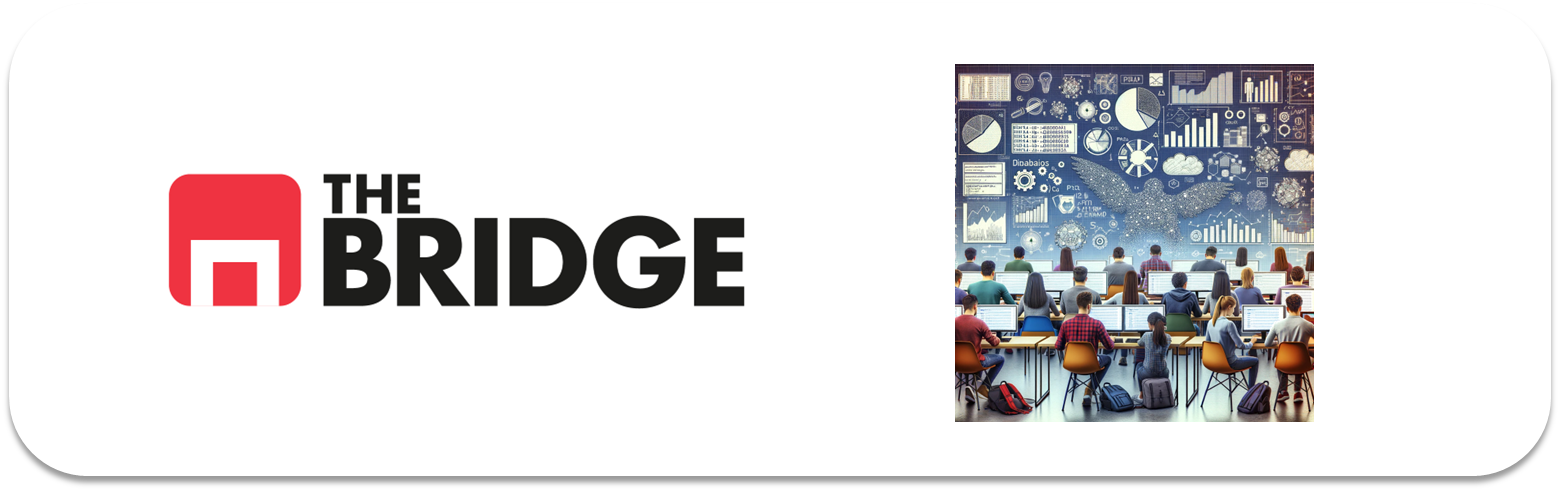

## PRACTICA OBLIGATORIA: **Clasificacion y Regresion Logistica**

* La práctica obligatoria de esta unidad consiste en modelar la supervivencia en el Titanic, por fin, además de una parte adicional multiclase. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión logística, evaluarlo contra un dataset de test reservado del original mostrando las métricas propias de los problemas de clasificación, la matriz de confusión y la curva ROC. Además se pide comparar las predicciones con los valores reales y al final adaptar el modelo a un problema multiclase.

Los pasos para guiar el trabajo:
1. Carga el dataset del Titanic. 
2. Deshazte de las variables que no vayas a usar. Limpia lo que creas necesarios pero no hagas imputaciones.
3. Escoge y analiza la variable target de forma gráfica y razona sobre el impacto de la distribución en los resultados esperados. Ten en cuenta que lo que queremos es poder predecir si un pasajero sobrevivirá.
4. Haz el split en train y test que creas conveniente pero asegurándote que ambos conjuntos tienen un reparto similar de pasajeros embarcados en las tres ciudades.
5. Construye las parejas X,y de train y test.
6. Ahora sí imputa los nulos con medias y modas en la X de train. Guarda esas medias que necesitarás en la parte de test.
7. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
8. Trata las variables para que funcionen lo mejor posible en el modelo.
9. Construye un modelo de regresión logística.
10. EXTRA: Analiza si lo crees conveniente los pesos y la importancia de las features.
11. Procesa el dataset de Test para que puedas usarlo en la evaluación 
12. Evalúa tu modelo contra el dataset de test y train. Obten las matrices de confusión y las métricas que creas adecuadas. Haz un pequeño assesment de su generabilidad.
13. EXTRA: Halla la probabilidad de supervivencia de un hombre de entre 30 y 40 años, que embarcó en Southampton en segunda clase, viajaba solo y no pagó el billete. PISTA: En este caso tendrás que calcular varias probabilidades y hacer la media de ellas.
14. EXTRA: Aprovecha todo el trabajo haciendo un único cambio en el target, ahora será la clase del viajero. Cambia el target quitándolo de X_train, X_test y añade a estos el target anterior. El resto no deberías cambiarlo. Entrena y evalua el modelo sólo con el classification_report.  



### 1. Loading the Titanic dataset

In [642]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [643]:
df_titanic = pd.read_csv('data/titanic.csv')
df_titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [644]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


### 2. Eliminating variables that will not be used and data cleansing

In [645]:
# Remove columns with a lot of nulls and the unnecessary ones
df_titanic.drop(['deck', 'alive', 'class', 'embarked', 'adult_male'], axis = 1, inplace = True)
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   who          891 non-null    object 
 8   embark_town  889 non-null    object 
 9   alone        891 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(3)
memory usage: 63.6+ KB


### 3. Graphical analysis of the target variable: survived

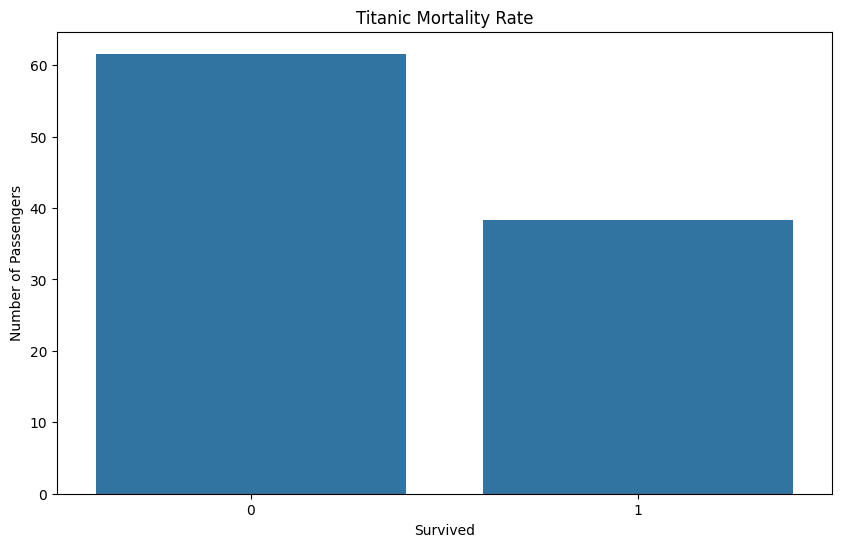

In [646]:
# Create a bar chart in relative frequencies
relative_frequencies = df_titanic["survived"].value_counts(normalize = True) * 100

plt.figure(figsize = (10, 6))
sns.barplot(x = relative_frequencies.index, y = relative_frequencies.values, legend = False)

# Add title and tags
plt.title('Titanic Mortality Rate')
plt.xlabel('Survived')
plt.ylabel('Number of Passengers')

plt.show()

### 4. Split in train and test ensuring similar delivery in shipping cities

In [647]:
from sklearn.model_selection import train_test_split

# Replace NaNs in embark_town by mode
df_titanic['embark_town'].fillna(df_titanic['embark_town'].mode()[0], inplace = True)

# Divide the dataset into train and test (80% - 20%)
X = df_titanic.drop(['survived'], axis = 1)
y = df_titanic['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = X['embark_town'], random_state = 42)

# Verify that the division has maintained the distribution
print(X_train['embark_town'].value_counts(normalize = True))
print(X_test['embark_town'].value_counts(normalize = True))

embark_town
Southampton    0.724719
Cherbourg      0.188202
Queenstown     0.087079
Name: proportion, dtype: float64
embark_town
Southampton    0.726257
Cherbourg      0.189944
Queenstown     0.083799
Name: proportion, dtype: float64


C:\Users\Noelia Montiel\AppData\Local\Temp\ipykernel_18952\3242788823.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_titanic['embark_town'].fillna(df_titanic['embark_town'].mode()[0], inplace = True)


### 5. Imputation of nulls in X_train

In [648]:
# Replace the NaNs in the age column with the median depending on whether it is a child, man or woman
median_child = X_train[(X_train['who'] == 'child')]['age'].median()
median_woman = X_train[(X_train['who'] == 'woman')]['age'].median()
median_man = X_train[(X_train['who'] == 'man')]['age'].median()

# Create function
def replace_with_median(row):
    if pd.isnull(row['age']):
        if row['who'] == 'child':
            return median_child
        elif row['who'] == 'woman':
            return median_woman
        elif row['who'] == 'man':
            return median_man
    return row['age']

# Apply function to DataFrame
X_train['age'] = X_train.apply(replace_with_median, axis = 1)
X_test['age'] = X_test.apply(replace_with_median, axis = 1)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 838 to 571
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pclass       712 non-null    int64  
 1   sex          712 non-null    object 
 2   age          712 non-null    float64
 3   sibsp        712 non-null    int64  
 4   parch        712 non-null    int64  
 5   fare         712 non-null    float64
 6   who          712 non-null    object 
 7   embark_town  712 non-null    object 
 8   alone        712 non-null    bool   
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 50.8+ KB


### 7. Mini-EDA

In [649]:
df_titanic_eda = X_train.copy()
df_titanic_eda["survived"] = y_train.copy()

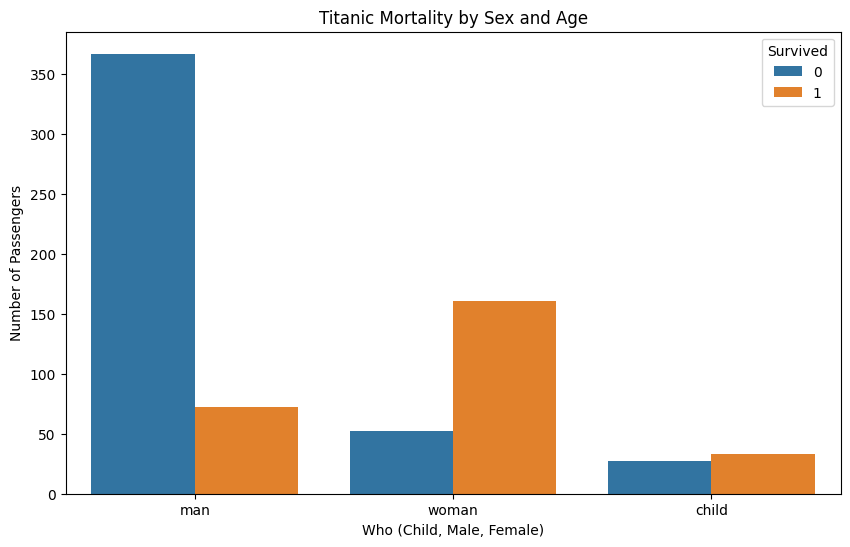

In [650]:
# Create a bar chart in relative frequencies
plt.figure(figsize = (10, 6))
sns.countplot(data = df_titanic_eda, x = 'who', hue = 'survived')

# Add title and tags
plt.title('Titanic Mortality by Sex and Age')
plt.xlabel('Who (Child, Male, Female)')
plt.ylabel('Number of Passengers')
plt.legend(title = 'Survived')

plt.show()

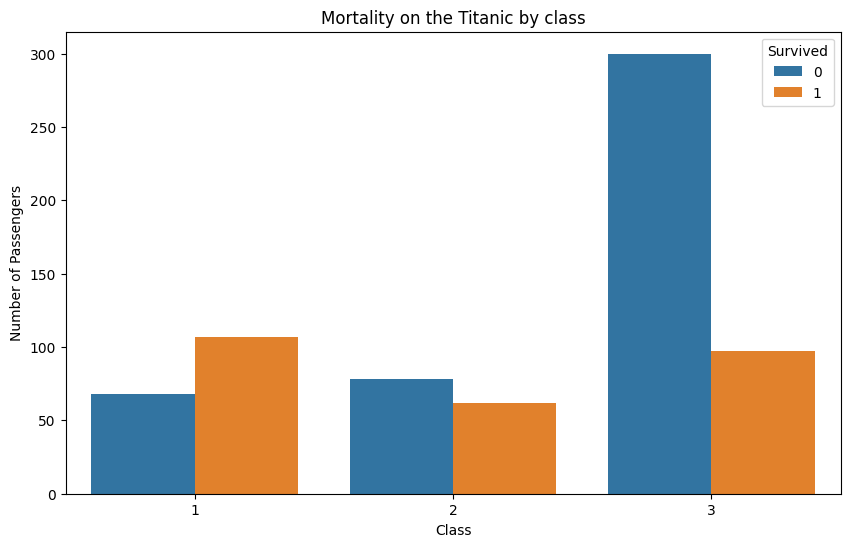

In [651]:
# Create a bar chart in relative frequencies
plt.figure(figsize = (10, 6))
sns.countplot(data = df_titanic_eda, x = 'pclass', hue = 'survived')

# Add title and tags
plt.title('Mortality on the Titanic by class')
plt.xlabel('Class')
plt.ylabel('Number of Passengers')
plt.legend(title = 'Survived')

plt.show()

<Figure size 1200x800 with 0 Axes>

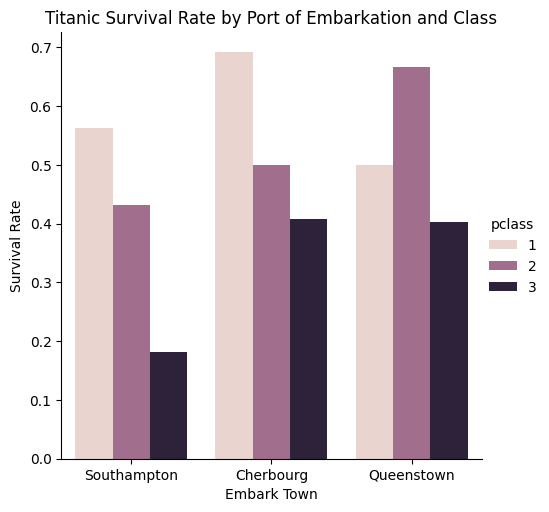

In [652]:
# Create a bar chart
plt.figure(figsize = (12, 8))
sns.catplot(data = df_titanic_eda.sort_values("pclass"), kind = 'bar', x = 'embark_town', hue = 'pclass', y = 'survived', errorbar = None)

# Add title and tags
plt.title('Titanic Survival Rate by Port of Embarkation and Class')
plt.xlabel('Embark Town')
plt.ylabel('Survival Rate')

plt.show()

### 8. Treatment of variables for the model and features selection

In [653]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

X_train['ordinal_sex'] = ordinal_encoder.fit_transform(X_train[['sex']])
X_test['ordinal_sex'] = ordinal_encoder.fit_transform(X_test[['sex']])
X_train[['ordinal_sex', 'sex']].sample(10)

,ordinal_sex,sex
453,1.0,male
430,1.0,male
367,0.0,female
263,1.0,male
808,1.0,male
726,0.0,female
301,1.0,male
329,0.0,female
30,1.0,male
483,0.0,female


**'sex'**:
- 0 = female
- 1 = male

In [654]:
categories_who = [['child', 'woman', 'man']]
ordinal_encoder_who = OrdinalEncoder(categories = categories_who)

X_train['ordinal_who'] = ordinal_encoder_who.fit_transform(X_train[['who']])
X_test['ordinal_who'] = ordinal_encoder_who.fit_transform(X_test[['who']])
X_train[['ordinal_who', 'who']].sample(10)

,ordinal_who,who
888,1.0,woman
606,2.0,man
48,2.0,man
659,2.0,man
577,1.0,woman
311,1.0,woman
231,2.0,man
475,2.0,man
107,2.0,man
331,2.0,man


**'who'**:
- 0 = child
- 1 = woman
- 2 = man

In [655]:
X_train['ordinal_alone'] = ordinal_encoder.fit_transform(X_train[['alone']])
X_test['ordinal_alone'] = ordinal_encoder.fit_transform(X_test[['alone']])
X_train[['ordinal_alone', 'alone']].sample(10)

,ordinal_alone,alone
737,1.0,True
812,1.0,True
409,0.0,False
489,0.0,False
483,1.0,True
205,0.0,False
496,0.0,False
74,1.0,True
308,0.0,False
196,1.0,True


**'alone'**:
- 0 = False
- 1 = True

In [656]:
X_train['ordinal_embark_town'] = ordinal_encoder.fit_transform(X_train[['embark_town']])
X_test['ordinal_embark_town'] = ordinal_encoder.fit_transform(X_test[['embark_town']])
X_train[['ordinal_embark_town', 'embark_town']].sample(10)

,ordinal_embark_town,embark_town
470,2.0,Southampton
855,2.0,Southampton
451,2.0,Southampton
93,2.0,Southampton
391,2.0,Southampton
127,2.0,Southampton
879,0.0,Cherbourg
192,2.0,Southampton
190,2.0,Southampton
603,2.0,Southampton


**'embark_town'**:
- 0 = Chergbourg
- 1 = Queenstown
- 2 = Southampton

In [657]:
X_train.drop(['sex', 'who', 'alone', 'embark_town'], axis = 1, inplace = True)

In [658]:
X_train.head(10)

,pclass,age,sibsp,parch,fare,ordinal_sex,ordinal_who,ordinal_alone,ordinal_embark_town
838,3,32.00,0,0,56.4958,1.0,2.0,1.0,2.0
621,1,42.00,1,0,52.5542,1.0,2.0,0.0,2.0
282,3,16.00,0,0,9.5000,1.0,2.0,1.0,2.0
275,1,63.00,1,0,77.9583,0.0,1.0,0.0,2.0
217,2,42.00,1,0,27.0000,1.0,2.0,0.0,2.0
277,2,31.00,0,0,0.0000,1.0,2.0,1.0,2.0
611,3,31.00,0,0,7.0500,1.0,2.0,1.0,2.0
644,3,0.75,2,1,19.2583,0.0,0.0,0.0,0.0
597,3,49.00,0,0,0.0000,1.0,2.0,1.0,2.0
506,2,33.00,0,2,26.0000,0.0,1.0,0.0,2.0


In [659]:
# Correlation matrix
df_titanic_eda = X_train.copy()
df_titanic_eda["survived"] = y_train.copy()

np.abs(df_titanic_eda.corr()['survived']).sort_values(ascending = False)

survived               1.000000
ordinal_sex            0.537353
ordinal_who            0.460980
pclass                 0.321097
fare                   0.263719
ordinal_alone          0.206772
ordinal_embark_town    0.193575
parch                  0.075400
age                    0.060492
sibsp                  0.019424
Name: survived, dtype: float64

In [660]:
corr = np.abs(df_titanic_eda.corr()['survived']).sort_values(ascending = False)

# Features with less than 0.05 correlation vs. target
bad_corr_feat = corr[corr < 0.05].index.values

# Filter out the good columns
df_titanic_eda.drop(columns = bad_corr_feat, inplace = True)

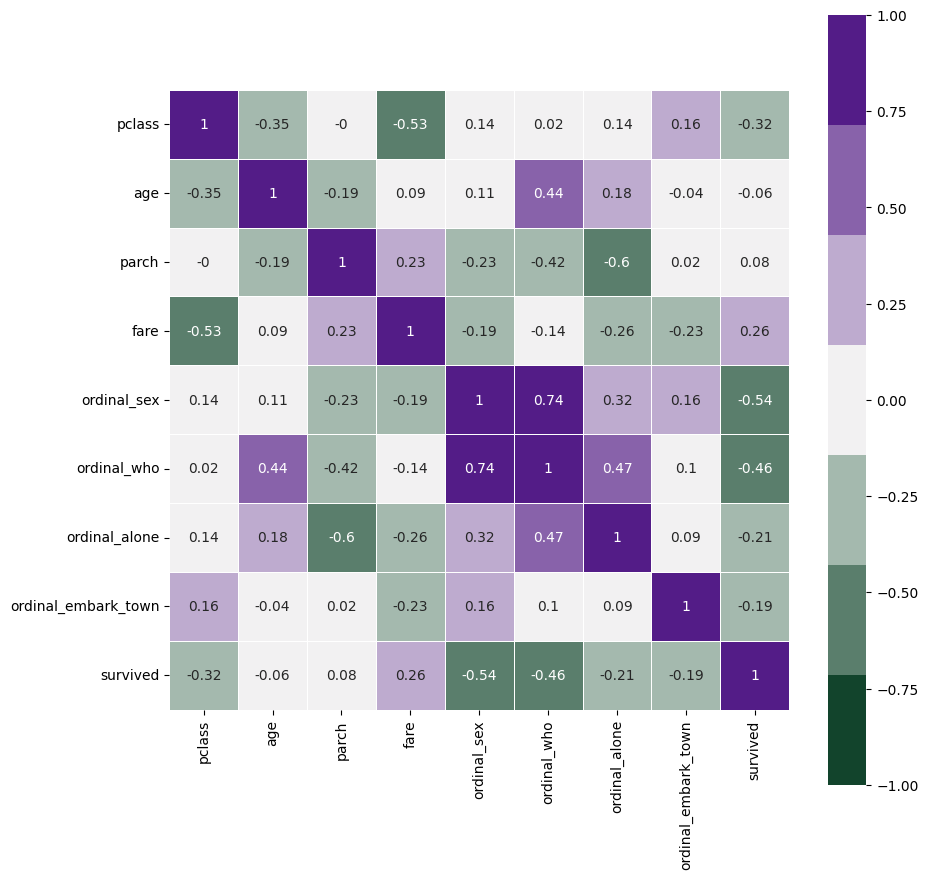

In [661]:
plt.figure(figsize = (10,10))
sns.heatmap(np.round(df_titanic_eda.corr(), 2),
        vmin = -1,
        vmax = 1,
        annot = True,
        cmap = sns.diverging_palette(145, 280, s = 85, l = 25, n = 7),
        square = True,
        linewidths = .5);

In [662]:
features_num = [col for col in df_titanic_eda.columns if "survived" not in col]
X_train = X_train[features_num].copy()

array([[<Axes: title={'center': 'pclass'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'parch'}>],
       [<Axes: title={'center': 'fare'}>,
        <Axes: title={'center': 'ordinal_sex'}>,
        <Axes: title={'center': 'ordinal_who'}>],
       [<Axes: title={'center': 'ordinal_alone'}>,
        <Axes: title={'center': 'ordinal_embark_town'}>, <Axes: >]],
      dtype=object)

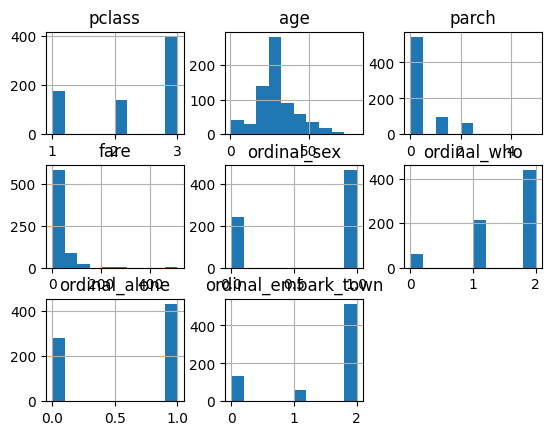

In [663]:
X_train.hist()

In [664]:
X_train['fare'].describe()

count    712.000000
mean      32.292771
std       51.721504
min        0.000000
25%        7.895800
50%       14.454200
75%       30.548950
max      512.329200
Name: fare, dtype: float64

### 9. Logistic regression model construction

In [665]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter = 1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

### 10. Analysis of the weights and importance of the features

In [666]:
print(log_reg.coef_)
print(log_reg.intercept_)
print(log_reg.classes_)

[[-0.86047269 -0.0077793  -0.49069828  0.00340821 -1.65947651 -0.99992113
  -0.01093243 -0.26246853]]
[4.63097304]
[0 1]


In [667]:
intercept = log_reg.intercept_
coefs = log_reg.coef_.ravel()
features = pd.DataFrame(coefs, X_train.columns, columns = ['coefficient']).copy()
features['coefficient'] = np.abs(features['coefficient'])
features.sort_values('coefficient', ascending = False).head(10)

,coefficient
ordinal_sex,1.659477
ordinal_who,0.999921
pclass,0.860473
parch,0.490698
ordinal_embark_town,0.262469
ordinal_alone,0.010932
age,0.007779
fare,0.003408


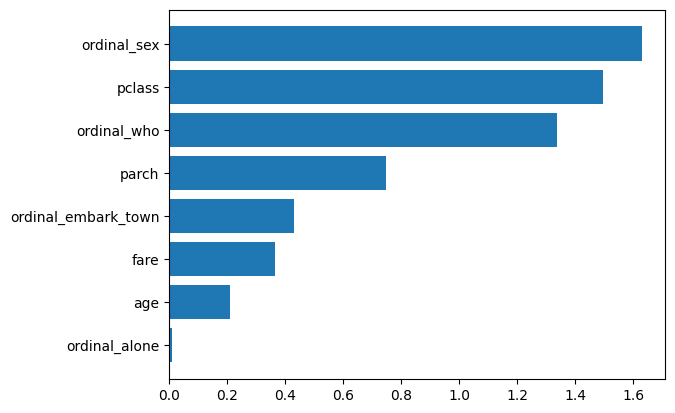

In [668]:
stdevs = []
for i in X_train.columns:
    stdev = df_titanic_eda[i].std()
    stdevs.append(stdev)

features["stdev"] = np.array(stdevs).reshape(-1, 1)
features["importance"] = features["coefficient"] * features["stdev"]
features['importance_standarized'] = features['importance'] / y_train.std()

features = features.sort_values('importance_standarized', ascending = True)
plt.barh(features.index, features.importance_standarized);

In [669]:
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

### 11. Accuracy

Before using the X_test we have to make the same transformations to them as we have done to the X_train

In [670]:
X_test = X_test[X_train.columns].copy()

In [671]:
from sklearn.metrics import accuracy_score

acc_train = round(accuracy_score(log_reg.predict(X_train), y_train), 3)
acc_test = round(accuracy_score(log_reg.predict(X_test), y_test), 3)

print("Accuracy train:", acc_train)
print("Accuracy test:", acc_test)

Accuracy train: 0.805
Accuracy test: 0.816


In [672]:
y_train.value_counts(True)

survived
0    0.626404
1    0.373596
Name: proportion, dtype: float64

In [673]:
y_test.value_counts(True)

survived
0    0.575419
1    0.424581
Name: proportion, dtype: float64

### 12. Model evaluation

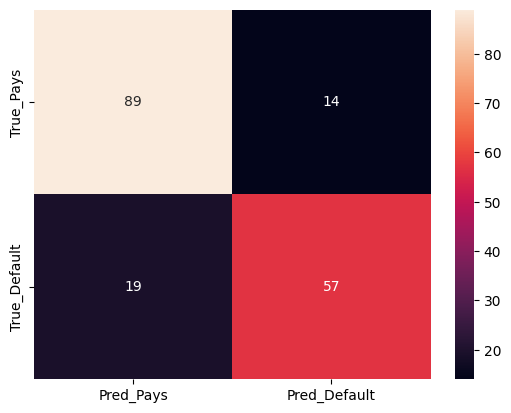

In [674]:
from sklearn.metrics import confusion_matrix

c_matrix = confusion_matrix(y_test, log_reg.predict(X_test))

c_matrix_df = pd.DataFrame(c_matrix, columns = ['Pred_Pays', 'Pred_Default'], index = ['True_Pays', 'True_Default'])

sns.heatmap(c_matrix_df, annot = True, fmt = 'g');

c:\Users\Noelia Montiel\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


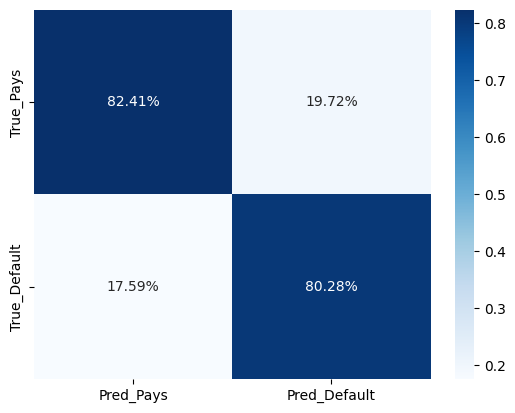

In [675]:
sns.heatmap(c_matrix_df / np.sum(c_matrix_df), annot = True, fmt = '.2%', cmap = 'Blues');

In [676]:
from sklearn.metrics import classification_report
from pprint import pprint

print(classification_report(y_test, log_reg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       103
           1       0.80      0.75      0.78        76

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.81       179



AUROC: 0.90


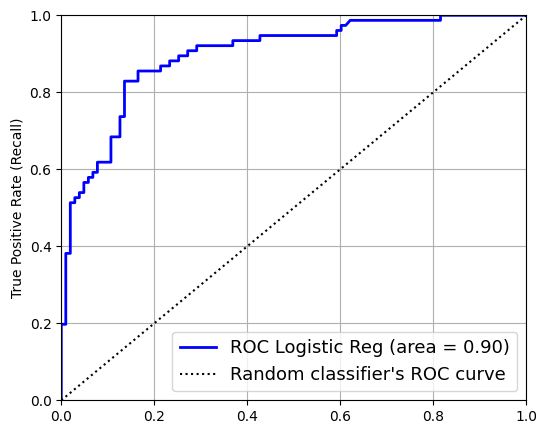

In [677]:
# ROC curve
from sklearn.metrics import roc_curve, auc

scores = log_reg.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, scores[:, 1])
roc_auc = auc(fpr,tpr)
print("AUROC: %.2f" % (roc_auc))

plt.figure(figsize = (6, 5))  
plt.plot(fpr, tpr, linewidth = 2, color = "blue", label = f"ROC Logistic Reg (area = {roc_auc:0.2f})")
plt.plot([0, 1], [0, 1], 'k:', label = "Random classifier's ROC curve")
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc = "lower right", fontsize = 13);

In [678]:
X_train.head()

,pclass,age,parch,fare,ordinal_sex,ordinal_who,ordinal_alone,ordinal_embark_town
838,3,32.0,0,56.4958,1.0,2.0,1.0,2.0
621,1,42.0,0,52.5542,1.0,2.0,0.0,2.0
282,3,16.0,0,9.5000,1.0,2.0,1.0,2.0
275,1,63.0,0,77.9583,0.0,1.0,0.0,2.0
217,2,42.0,0,27.0000,1.0,2.0,0.0,2.0


The model seems to fit and is quite good.

### 13. Probability of survival of a new passenger

In [680]:
# Create a DataFrame with the passenger's characteristics
# Use the same preprocessing as in X_train
def create_passenger(age):
    return pd.DataFrame({
    'pclass': [2],              # Second class
    'age': [age],               # Variable age
    'parch': [0],               # No parents or children on board
    'fare': [0],                # No ticket paid
    'ordinal_sex': [1],         # Male
    'ordinal_who': [2],         # Male
    'ordinal_alone': [1],       # Traveling alone
    'ordinal_embark_town': [2]  # Embarked in Southampton
})

# Calculate the probability for ages between 30 and 40 years old
probabilities = []

for age in range(30, 41):  # Beetween 30 and 40 years old
    passenger = create_passenger(age)
    passenger = passenger.reindex(columns = X_train.columns, fill_value = 0)  # Align with the columns of X_train
    probability = log_reg.predict_proba(passenger)[:, 1]  # Probability of survival
    probabilities.append(probability[0])

# Calcular la media de las probabilidades
average_probability = np.mean(probabilities)

# Mostrar el resultado
print(f"The average probability of survival for a man between 30 and 40 years of age is: {average_probability:.2f}")

The average probability of survival for a man between 30 and 40 years of age is: 0.17


### 14. Adaptation of the model to a multiclass problem (traveler's class)

In [681]:
# Change target to pclass
y_train_multiclass = X_train['pclass']
y_test_multiclass = X_test['pclass']
X_train = X_train.drop('pclass', axis = 1)
X_test = X_test.drop('pclass', axis = 1)

# Re-training the model
log_reg.fit(X_train, y_train_multiclass)

# Evaluation
y_pred_multiclass = log_reg.predict(X_test)
print(classification_report(y_test_multiclass, y_pred_multiclass))

              precision    recall  f1-score   support

           1       0.88      0.93      0.90        41
           2       0.86      0.14      0.24        44
           3       0.71      0.97      0.82        94

    accuracy                           0.75       179
   macro avg       0.82      0.68      0.65       179
weighted avg       0.78      0.75      0.69       179

